# PRÁCTICAS

### Leemos los datos


In [81]:
with open("C:/Users/1487846/Documents/GCD/PRACTICAS/D_ORCA006_4_DOMs_0_NB_LOW_2_NB_HIGH_2021-10-22_sk.dmp","rb") as f:
    data = f.read(100000)
    
datos = data.hex(' ')
datos=datos[12:]

In [82]:
import re
#El atributo span indica los caracteres inicial y final del match
re.search("54 54 44 43", datos) 

<re.Match object; span=(0, 11), match='54 54 44 43'>

In [75]:
re.search("0e 23 00 00", datos)

<re.Match object; span=(26922, 26933), match='0e 23 00 00'>

In [76]:
#Para obtener un objeto Match por cada patrón encontrado hay que usar la función re.finditer()
re.findall("54 54 44 43", datos)

['54 54 44 43',
 '54 54 44 43',
 '54 54 44 43',
 '54 54 44 43',
 '54 54 44 43',
 '54 54 44 43',
 '54 54 44 43',
 '54 54 44 43',
 '54 54 44 43',
 '54 54 44 43',
 '54 54 44 43',
 '54 54 44 43']

In [77]:
re.findall("0e 23 00 00", datos)

['0e 23 00 00',
 '0e 23 00 00',
 '0e 23 00 00',
 '0e 23 00 00',
 '0e 23 00 00',
 '0e 23 00 00',
 '0e 23 00 00',
 '0e 23 00 00',
 '0e 23 00 00',
 '0e 23 00 00',
 '0e 23 00 00']

In [83]:
#Para obtener un objeto Match por cada patrón encontrado hay que usar la función re.finditer()
patrones = re.finditer("54 54 44 43", datos)
patrones

inicios_dom=[]
for p in patrones:
    i=p.end()+1
    inicios_dom.append(i)
    
inicios_dom

[12,
 26946,
 53880,
 80814,
 107748,
 134682,
 161616,
 188550,
 215484,
 242418,
 269352,
 296286]

In [79]:
patrones1 = re.finditer("0e 23 00 00", datos)
patrones1

finales_dom=[]
for p in patrones1:
    i=p.start()-1
    finales_dom.append(i)
    
finales_dom

[26921,
 53855,
 80789,
 107723,
 134657,
 161591,
 188525,
 215459,
 242393,
 269327,
 296261]

In [10]:
data_type= list()
run_number = list()
udp_seq_number = list()
TS1 = list() #Timestamp Gross [s]
TS2 = list() #Timestamp Tick [16ns]
DOM_ID = list()
TDC_channel = list() #canales dentro de 1 dom
TS3 = list() #Timestamp [ns]
pulse_width = list() #duración

def particionar():
    data_type.append(datos_def[0:4])
    
    run_number.append(datos_def[4:8])
    
    udp_seq_number.append(datos_def[8:12])
    
    TS1.append(datos_def[12:16])
    
    TS2.append(datos_def[16:20])
    
    DOM_ID.append(datos_def[20:24])
    
    for i in range(48,len(datos_def),6):
        TDC_channel.append(datos_def[i])
        
    for j in range(49,len(datos_def),6):
        TS3.append(datos_def[j:j+4])
        
    for k in range(53,len(datos_def),6):
        pulse_width.append(datos_def[k])
        
    return(data_type,run_number,udp_seq_number,TS1,TS2, DOM_ID,TDC_channel,TS3,pulse_width)


In [11]:
data_type,run_number,udp_seq_number,TS1,TS2, DOM_ID,TDC_channel,TS3,pulse_width=particionar()

In [12]:
DOM_ID

[['80', '00', '40', '18']]

In [84]:
def particionar_def(datos_def):
    data_type.append(datos_def[0:4])
    
    run_number.append(datos_def[4:8])
    
    udp_seq_number.append(datos_def[8:12])
    
    TS1.append(datos_def[12:16])
    
    TS2.append(datos_def[16:20])
    
    DOM_ID.append(datos_def[20:24])
    
    for i in range(48,len(datos_def),6):
        TDC_channel.append(datos_def[i])
        
    for j in range(49,len(datos_def),6):
        TS3.append(datos_def[j:j+4])
        
    for k in range(53,len(datos_def),6):
        pulse_width.append(datos_def[k])
        
    longdoms.append(len(TDC_channel))
        
    return(data_type,run_number,udp_seq_number,TS1,TS2, DOM_ID,TDC_channel,TS3,pulse_width,longdoms)

In [85]:
data_type,run_number,udp_seq_number,TS1,TS2, DOM_ID,TDC_channel,TS3,pulse_width= particionar()

In [86]:
data_type= list()
run_number = list()
udp_seq_number = list()
TS1 = list() #Timestamp Gross [s]
TS2 = list() #Timestamp Tick [16ns]
DOM_ID = list()
TDC_channel = list() #canales dentro de 1 dom
TS3 = list() #Timestamp [ns]
pulse_width = list() #duración

longdoms=list()

for i in range (len(finales_dom)):
    datos1 = datos[inicios_dom[i]:finales_dom[i]]
    str(datos1)
    datos_def=datos1.split(' ')
    data_type,run_number,udp_seq_number,TS1,TS2, DOM_ID,TDC_channel,TS3,pulse_width,longdoms= particionar_def(datos_def)



In [87]:

print(longdoms)
longdoms_def=[]

for i in range(len(longdoms)):
    if longdoms[i]!=1487:
        longdoms_def.append(longdoms[i]-longdoms[i-1])
    else:
        longdoms_def.append(longdoms[i])
    
    
longdoms_def

[1487, 2974, 4461, 5948, 7435, 8922, 10409, 11896, 13383, 14870, 16357]


[1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487]

In [88]:
DOM_hexad=[]
TS2_hexad=[]
TS1_hexad=[]
udp_seq_number_hexad=[]
run_number_hexad=[]
data_type_hexad=[]

for i in range(len(data_type)):
    data_type_hexad.append(''.join(data_type[i]))
    run_number_hexad.append(''.join(run_number[i]))
    udp_seq_number_hexad.append(''.join(udp_seq_number[i]))
    TS1_hexad.append(''.join(TS1[i]))
    TS2_hexad.append(''.join(TS2[i]))
    DOM_hexad.append(''.join(DOM_ID[i]))

print("Data Type en hexadecimal:",data_type_hexad)
print("Run Number en hexadecimal:",run_number_hexad)
print("UDP Sequence Number en hexadecimal:",udp_seq_number_hexad)
print("TS1 en hexadecimal:",TS1_hexad)
print("TS2 en hexadecimal:",TS2_hexad)
print("ID del DOM en hexadecimal:",DOM_hexad)



Data Type en hexadecimal: ['00002b61', '00002b61', '00002b61', '00002b61', '00002b61', '00002b61', '00002b61', '00002b61', '00002b61', '00002b61', '00002b61']
Run Number en hexadecimal: ['00000015', '0000000a', '0000000e', '00000016', '00000008', '00000017', '0000000b', '0000000f', '00000018', '00000009', '00000010']
UDP Sequence Number en hexadecimal: ['61726134', '61726134', '61726134', '61726134', '61726134', '61726134', '61726134', '61726134', '61726134', '61726134', '61726134']
TS1 en hexadecimal: ['01dcd650', '01dcd650', '01dcd650', '01dcd650', '01dcd650', '01dcd650', '01dcd650', '01dcd650', '01dcd650', '01dcd650', '01dcd650']
TS2 en hexadecimal: ['30381406', '30304ec9', '3037fff9', '30381406', '30381813', '30381406', '30304ec9', '3037fff9', '30381406', '30381813', '3037fff9']
ID del DOM en hexadecimal: ['80004018', '80200000', '80000019', '80004018', '80000000', '80404018', '80200000', '80000019', '80404018', '80000000', '80000019']


In [89]:
DOM_decimal=[]

for i in range(len(DOM_hexad)):
    DOM_decimal.append(int(DOM_hexad[i],16))
DOM_decimal

[2147500056,
 2149580800,
 2147483673,
 2147500056,
 2147483648,
 2151694360,
 2149580800,
 2147483673,
 2151694360,
 2147483648,
 2147483673]

In [51]:
#TS1_decimal = int(TS1_hexad,16)
#TS2_decimal = int(TS2_hexad,16)
#print("TS1 en hexadecimal:",TS1_hexad)
#print("TS1 en decimal:",TS1_decimal) #UTC EN SEGUNDOS
#print("TS2 en hexadecimal:",TS2_hexad)
#print("TS2 en decimal:",TS2_decimal) #NANOSEGUNDOS
    

In [90]:
TS1_decimal=[]
TS2_decimal=[]

for i in range(len(TS2_hexad)):
    TS1_decimal.append(int(TS1_hexad[i],16))
    TS2_decimal.append(int(TS2_hexad[i],16))

TS1_decimal
TS2_decimal

[808981510,
 808472265,
 808976377,
 808981510,
 808982547,
 808981510,
 808472265,
 808976377,
 808981510,
 808982547,
 808976377]

In [91]:
import numpy as np
from matplotlib import pyplot as plt

TDC_channel_decimal=[]
for i in range(len(TDC_channel)):
    TDC_channel_hexad=''.join(TDC_channel[i])
    #print("Canal en hexadecimal",TDC_channel_hexad)
    TDC_channel_decimal.append(int(TDC_channel_hexad,16))
   
print(len(TDC_channel_decimal))
TDC_channel_decimal

16357


[12,
 21,
 6,
 23,
 7,
 29,
 28,
 18,
 7,
 24,
 2,
 25,
 10,
 22,
 1,
 2,
 5,
 6,
 7,
 8,
 9,
 9,
 10,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 18,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 20,
 20,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 23,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 28,
 28,
 28,
 28,
 28,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 7,
 7,
 8,
 9,
 9,
 10,
 10,
 10,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17

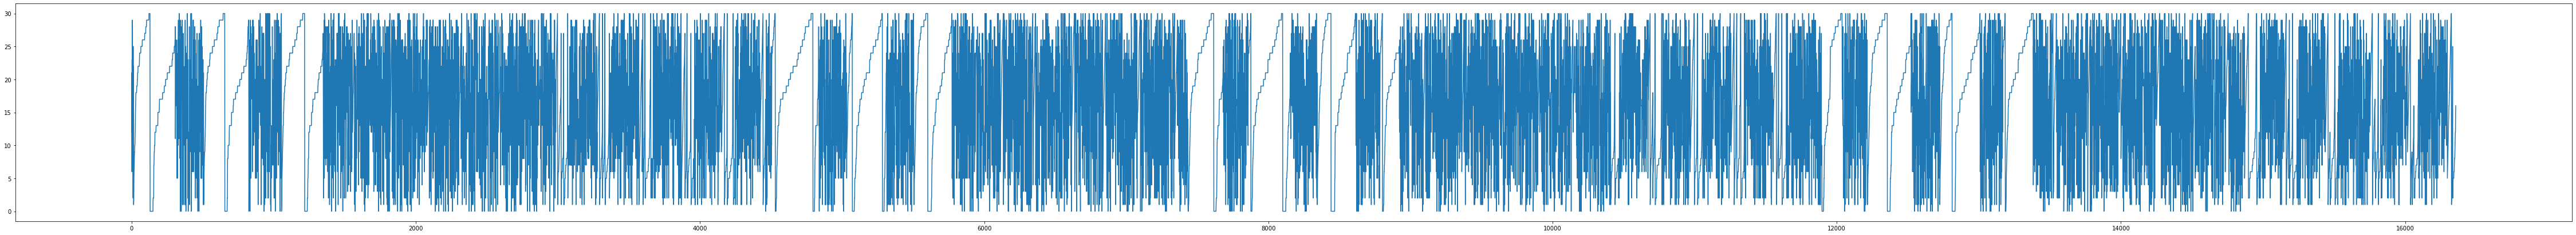

In [94]:
plt.figure(figsize=(80,7))
plt.plot(TDC_channel_decimal) 
plt.show()

In [95]:
TS3_decimal= []

for i in range(len(TS3)):
    TS3_hexad=''.join(TS3[i])
    
    #print(TS3_hexad)
    TS3_decimal.append(int(TS3_hexad,16))
    #print(TS3_decimal)


In [96]:
len(TS3_decimal)

16357

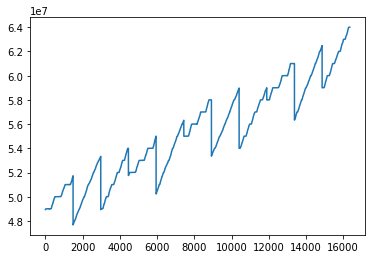

In [97]:
plt.plot(TS3_decimal) 
plt.show()

In [98]:
#duración
len(pulse_width)

16357

In [99]:
pulse_width_decimal=[]
for i in range(len(pulse_width)):
    pulse_width_hexad=''.join(pulse_width[i])
    #print("Canal en hexadecimal",TDC_channel_hexad)
    pulse_width_decimal.append(int(pulse_width_hexad,16))

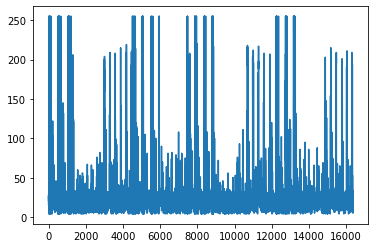

In [100]:
plt.plot(pulse_width_decimal) 
plt.show()

## 1º PAQUETE DE DATOS organizado en diccionarios

In [101]:
DOM_ID

[['80', '00', '40', '18'],
 ['80', '20', '00', '00'],
 ['80', '00', '00', '19'],
 ['80', '00', '40', '18'],
 ['80', '00', '00', '00'],
 ['80', '40', '40', '18'],
 ['80', '20', '00', '00'],
 ['80', '00', '00', '19'],
 ['80', '40', '40', '18'],
 ['80', '00', '00', '00'],
 ['80', '00', '00', '19']]

In [102]:
DOM_decimal

[2147500056,
 2149580800,
 2147483673,
 2147500056,
 2147483648,
 2151694360,
 2149580800,
 2147483673,
 2151694360,
 2147483648,
 2147483673]

In [103]:
lista_DOM = []

for i in range (len(longdoms_def)):
    for j in range(longdoms_def[i]):
        lista_DOM.append(DOM_decimal[i])
len(lista_DOM)

16357

In [104]:
TS2_3 =[]

for i in range(len(longdoms_def)):
    for j in range(longdoms_def[i]):
        suma=TS2_decimal[i] + TS3_decimal[j]
        TS2_3.append(suma)

In [105]:
lista_TS1 = []

for i in range (len(longdoms_def)):
    for j in range(longdoms_def[i]):
        lista_TS1.append(TS1_decimal[i])
len(lista_TS1)

16357

In [106]:
import pandas as pd

DOM1 = pd.DataFrame()
DOM1['ID_DOM'] = lista_DOM
DOM1['ID_CHANNEL'] = TDC_channel_decimal
DOM1['TS1'] = lista_TS1
DOM1['TS2_TS3'] = TS2_3
DOM1['DURACIÓN'] = pulse_width_decimal

In [107]:
DOM1


,ID_DOM,ID_CHANNEL,TS1,TS2_TS3,DURACIÓN
0,2147500056,12,31250000,857920205,21
1,2147500056,21,31250000,857923637,27
2,2147500056,6,31250000,857926230,25
3,2147500056,23,31250000,857928872,25
4,2147500056,7,31250000,857931759,25
...,...,...,...,...,...
16352,2147483673,11,31250000,860674666,14
16353,2147483673,12,31250000,860694350,8
16354,2147483673,12,31250000,860697075,5
16355,2147483673,15,31250000,860702120,22


In [108]:
quiero=DOM1.loc[:,'ID_CHANNEL']==1
quiero2=DOM1.loc[:,'ID_DOM']==2147500056
DOM1.loc[quiero & quiero2]

,ID_DOM,ID_CHANNEL,TS1,TS2_TS3,DURACIÓN
14,2147500056,1,31250000,857981601,68
358,2147500056,1,31250000,858253179,9
363,2147500056,1,31250000,858287530,26
374,2147500056,1,31250000,858313610,24
378,2147500056,1,31250000,858325863,29
407,2147500056,1,31250000,858475091,25
504,2147500056,1,31250000,858940704,29
507,2147500056,1,31250000,858981604,70
890,2147500056,1,31250000,859228803,28
911,2147500056,1,31250000,859341740,23
